**Mutlilevel Classification Probelm**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("Dataset.csv")

In [4]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [5]:
# to know how many rows and colums are there in the dataset
df.shape

(962, 2)

In [6]:
# to know which all category exist in the dataset
labels=df['Category'].unique()
labels

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [7]:
# to count how many distinct category exist
df['Category'].nunique()

25

In [8]:
# to know which category has how many entries in the dataset
counts=df['Category'].value_counts()
counts

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

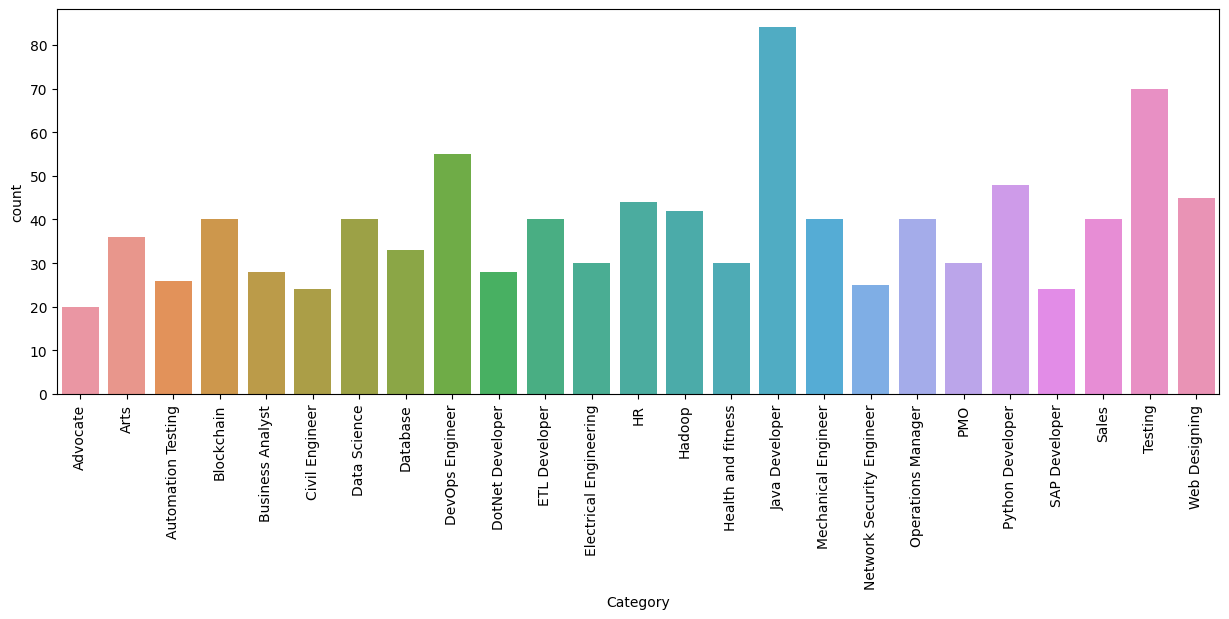

In [9]:
# to visualize the above data using histogram
df['Category'] = df['Category'].astype('category')
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='Category')
plt.xticks(rotation=90)
plt.show()

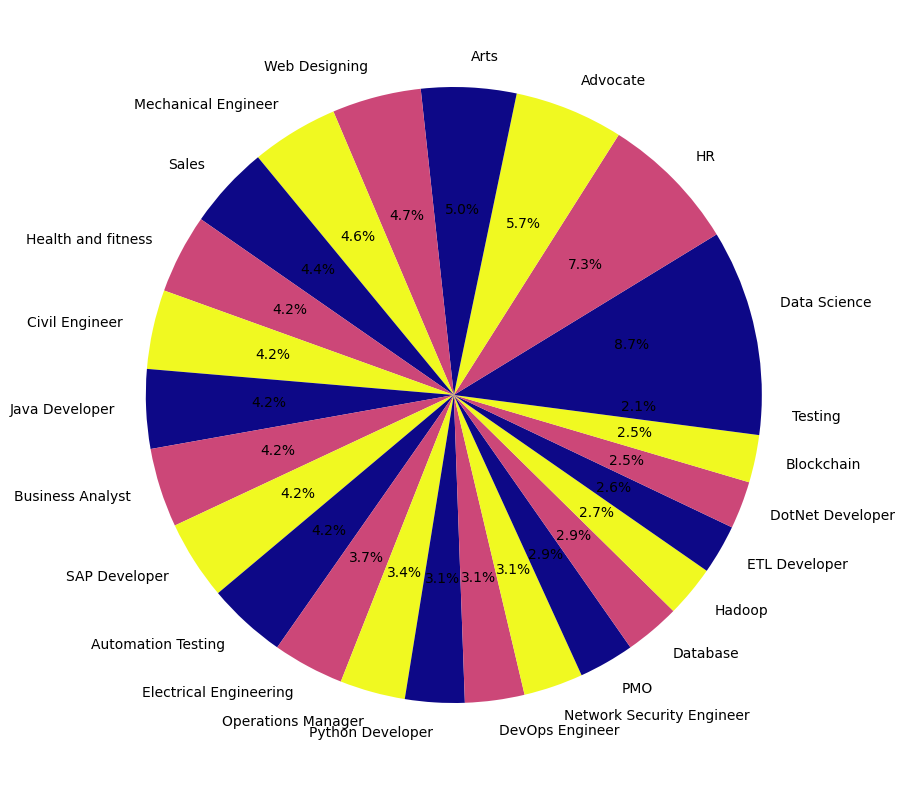

In [10]:
# to visualize the above using pie chart
plt.figure(figsize=(15,10))
plt.pie(counts,labels=labels,autopct='%1.1f%%',shadow=False, colors=plt.cm.plasma(np.linspace(0,1,3)))
plt.show()

**Exploring resume**

In [11]:
# to know what is the category of fist entry in the dataset
df['Category'][0]

'Data Science'

In [12]:
# to visulaize the first resume so that we can get idea of what all cleaning we need to do the relevant information
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

**Cleaning Data**

In [13]:
# We will remove urls,hastags,mentions,special letters,punctutaions
# Method 1 : Using Regular Expression
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText

In [14]:
cleanResume(df['Resume'][0])

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

In [15]:
# Method 2 : Using spacy module of nltk
import spacy
nlp = spacy.load("en_core_web_sm")

def cleanResume1(txt):
    doc = nlp(txt)
    cleaned_text = []
    for token in doc:
        if not token.like_url:  # Remove URLs
            if token.text != 'RT' and token.text != 'cc':  # Remove 'RT' and 'cc'
                if not token.text.startswith('#'):  # Remove hashtags
                    if not token.text.startswith('@'):  # Remove usernames starting with '@'
                        if token.text.isascii():  # Remove non-ASCII characters
                            cleaned_text.append(token.text)
    return ' '.join(cleaned_text)

In [16]:
cleanResume1(df['Resume'][0])

'Skills * Programming Languages : Python ( pandas , numpy , scipy , scikit - learn , matplotlib ) , Sql , Java , JavaScript / JQuery . * Machine learning : Regression , SVM , Bayes , KNN , Random Forest , Decision Trees , Boosting techniques , Cluster Analysis , Word Embedding , Sentiment Analysis , Natural Language processing , Dimensionality reduction , Topic Modelling ( LDA , NMF ) , PCA & Neural Nets . * Database Visualizations : Mysql , SqlServer , Cassandra , Hbase , ElasticSearch , , Plotly , kibana , matplotlib , ggplot , Tableau . * Others : Regular Expression , HTML , CSS , Angular 6 , Logstash , Kafka , Python Flask , Git , Docker , computer vision - Open CV and understanding of Deep learning . Education Details \r\n\r\n Data Science Assurance Associate \r\n\r\n Data Science Assurance Associate - Ernst & Young LLP \r\n Skill Details \r\n JAVASCRIPT- Exprience - 24 months \r\n jQuery- Exprience - 24 months \r\n Python- Exprience - 24 monthsCompany Details \r\n company - Ernst

In [17]:
# Method 3 : Using String inbuilt methods
def cleanResume2(txt):
    # Remove URLs
    txt = ' '.join(word for word in txt.split() if not (word.startswith('http://') or word.startswith('https://')))
    # Remove 'RT' and 'cc'
    txt = txt.replace('RT', ' ').replace('cc', ' ')
    # Remove hashtags
    txt = ' '.join(word for word in txt.split() if not word.startswith('#'))
    # Remove usernames starting with '@'
    txt = ' '.join(word for word in txt.split() if not word.startswith('@'))
    # Remove special characters
    special_chars = """!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""
    for char in special_chars:
        txt = txt.replace(char, ' ')
    # Remove non-ASCII characters
    txt = ''.join(char if ord(char) < 128 else ' ' for char in txt)
    # Remove extra whitespaces
    txt = ' '.join(txt.split())
    
    return txt

In [18]:
cleanResume2(df['Resume'][0])

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

In [19]:
# calling the above method for each resume and storing the cleaned resume
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [20]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

**Converting the Category column into numbers**

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [22]:
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

**Vactorization**

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
requiredText  = tfidf.transform(df['Resume'])

requiredText 

<962x7351 sparse matrix of type '<class 'numpy.float64'>'
	with 164261 stored elements in Compressed Sparse Row format>

**Splitting**

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(requiredText, df['Category'], test_size=0.2, random_state=42)

In [26]:
# to know how much data will be used for training the model
X_train.shape

(769, 7351)

In [27]:
# to know how much data will be used for testing the model
X_test.shape

(193, 7351)

**Training the model and printing its classification report :**

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier

clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train,y_train)
ypred = clf.predict(X_test)
print(ypred)

[15 15 15 13 14 17 16  2  0 14 13 12 16 23 20  5  6  4 10  9 19  1 10 23
 23 21 22 22  2 12 18  1  8 24 11 23  7 12 24  8 18  6  8 19 24 23 21  1
 15  4 15 22 11  5 15 13  1 19  5 12 22 22 20 24 21 18 12 10 10 20 10  8
  9 21 17 21  0 17 16 14 15 11 11  8 20  3 19  8  0  2  9 10  2 23 20 20
 23 12 18 12  7 16  8 14 18  3 14 19 14 14 15 18  8  2 21 18 23 10 23  5
 11 15 12  3  5  3  7 12 19  8 20 19  3 15  9 19  1 23 21  5 20 15 16  7
  7  8 15 18  1 15 13 20  7  4 18 11  5 15  5 12  9 22 18 21  8 23  4 12
 24 16 15 22  8 22  3 16 23 23 12  7 16 18  5  3 18  8 23 23 20 21  6  7
 23]


In [29]:
# to calculate the accuracy report
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,ypred))

0.9844559585492227


**Prediction System**

In [31]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf, open('clf.pkl', 'wb'))